In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('./'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

./Project 2.ipynb
./.ipynb_checkpoints/Project 2-checkpoint.ipynb
./data/data.csv
./data/.ipynb_checkpoints/data-checkpoint.csv


# 1. Frame the problem
Using the customer description, Define the problem your trying to solve in your own words (remember this is not technial but must be specific so the customer understands the project)

Given an User ID, Name, Gender, Age, Estimated Salary, as well as Purchased data on previous customers, we wish to be able to predict if someone will buy, not buy, or return an object through the usage of various machine learning models, namely Logistic Regression. 

# 2. Get the Data 
Define how you recieved the data (provided, gathered..)

The data was already provided to me by Mr. Rivero, I just have to load it in.

In [5]:
import pandas as pd
import numpy as np
import os


saleDataPath = os.path.join("data", "data.csv")
importedData = pd.read_csv(saleDataPath)

cleanedData = importedData.drop(["name"], axis=1)

print('Complete')

Complete


# 3. Explore the Data
Gain insights into the data you have from step 2, making sure to identify any bias

Potential Bias: Sample size is too little to properly form conclusions, and it does not take into account proper demographics, only for that specific site. For example, if it is a physical location, it only deals with that location, and if it's an online site, it'd be limited to people who'd have access to the internet. 

Furthermore, there is no proper pattern, meaning that if the model was to be made, it'd most likely have a very high relative RMSE score due to the pure randomness

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          1001 non-null   int64 
 1   name             1001 non-null   object
 2   Gender           1001 non-null   object
 3   Age              1001 non-null   int64 
 4   EstimatedSalary  1001 non-null   int64 
 5   Purchased        1001 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 47.0+ KB
None 


Corr Matrix:
Purchased          1.000000
EstimatedSalary    0.031905
Age                0.016811
Gender_Female      0.001992
Gender_Male       -0.001992
User ID           -0.057077
Name: Purchased, dtype: float64




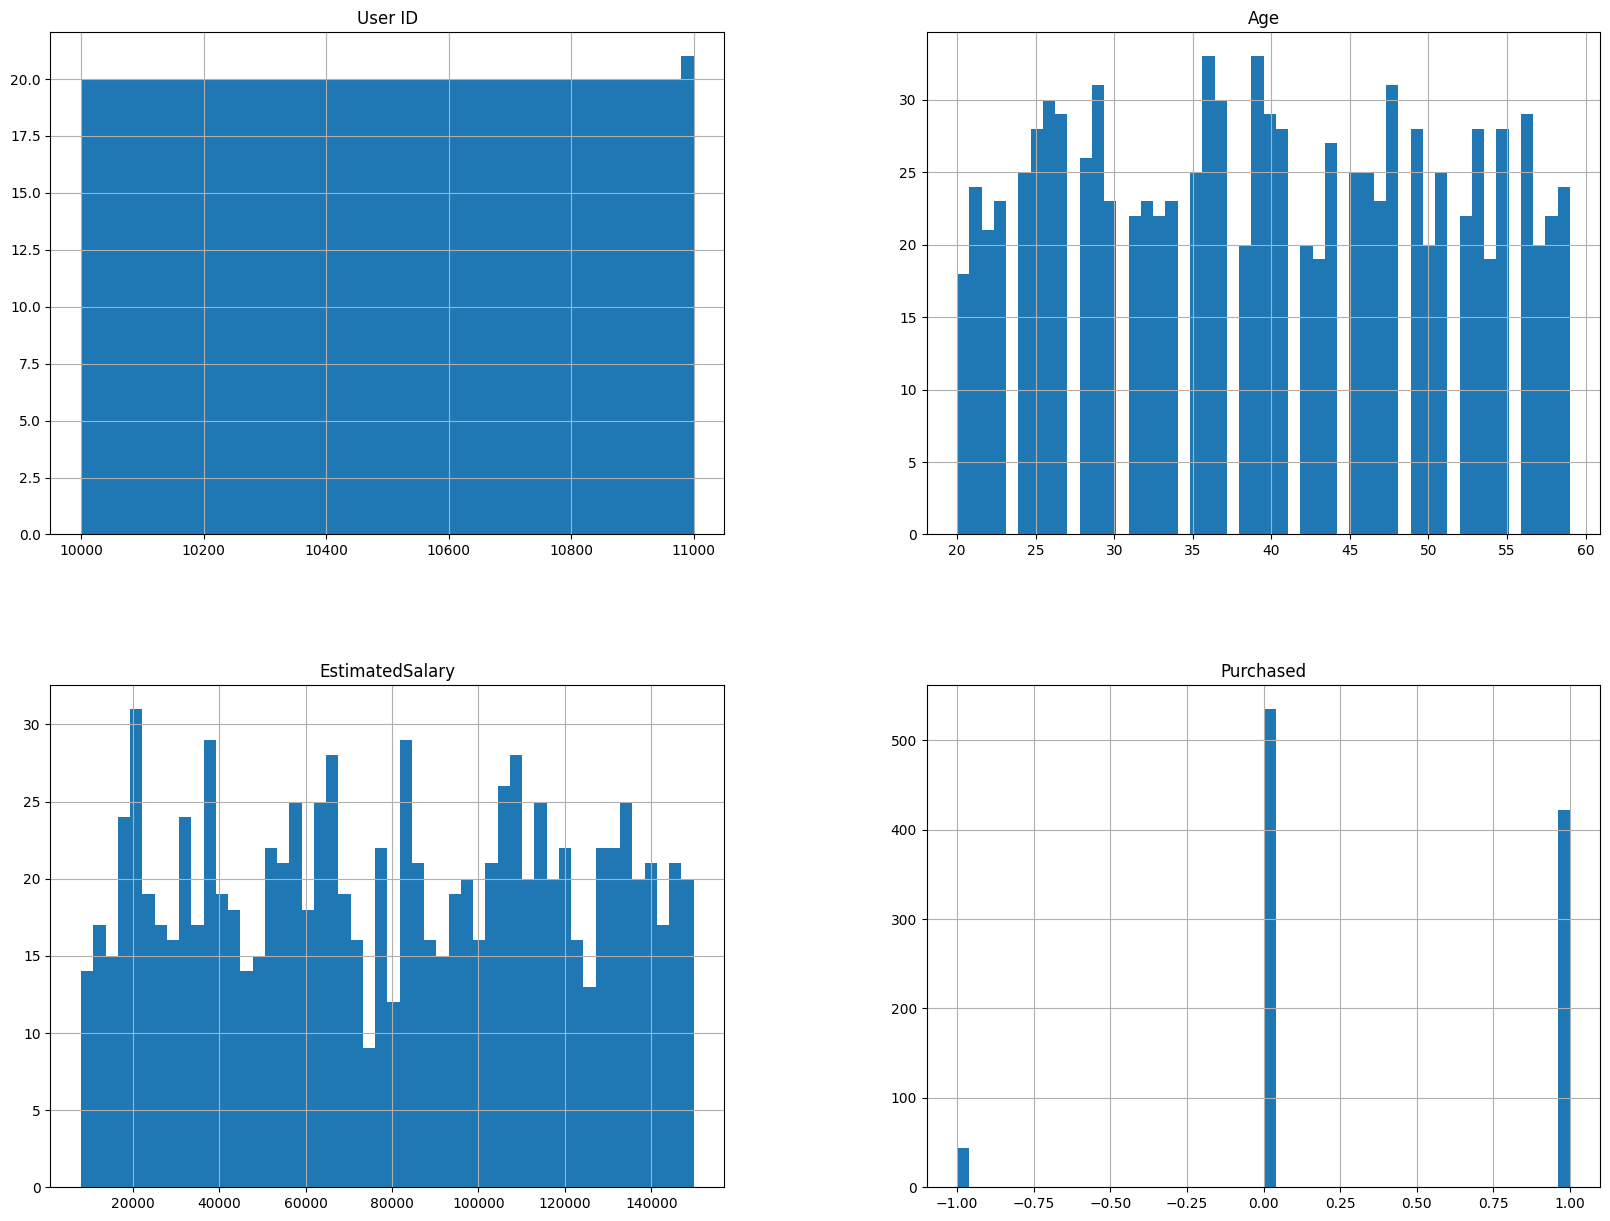

array([[<Axes: xlabel='Age', ylabel='Age'>,
        <Axes: xlabel='EstimatedSalary', ylabel='Age'>,
        <Axes: xlabel='Purchased', ylabel='Age'>],
       [<Axes: xlabel='Age', ylabel='EstimatedSalary'>,
        <Axes: xlabel='EstimatedSalary', ylabel='EstimatedSalary'>,
        <Axes: xlabel='Purchased', ylabel='EstimatedSalary'>],
       [<Axes: xlabel='Age', ylabel='Purchased'>,
        <Axes: xlabel='EstimatedSalary', ylabel='Purchased'>,
        <Axes: xlabel='Purchased', ylabel='Purchased'>]], dtype=object)

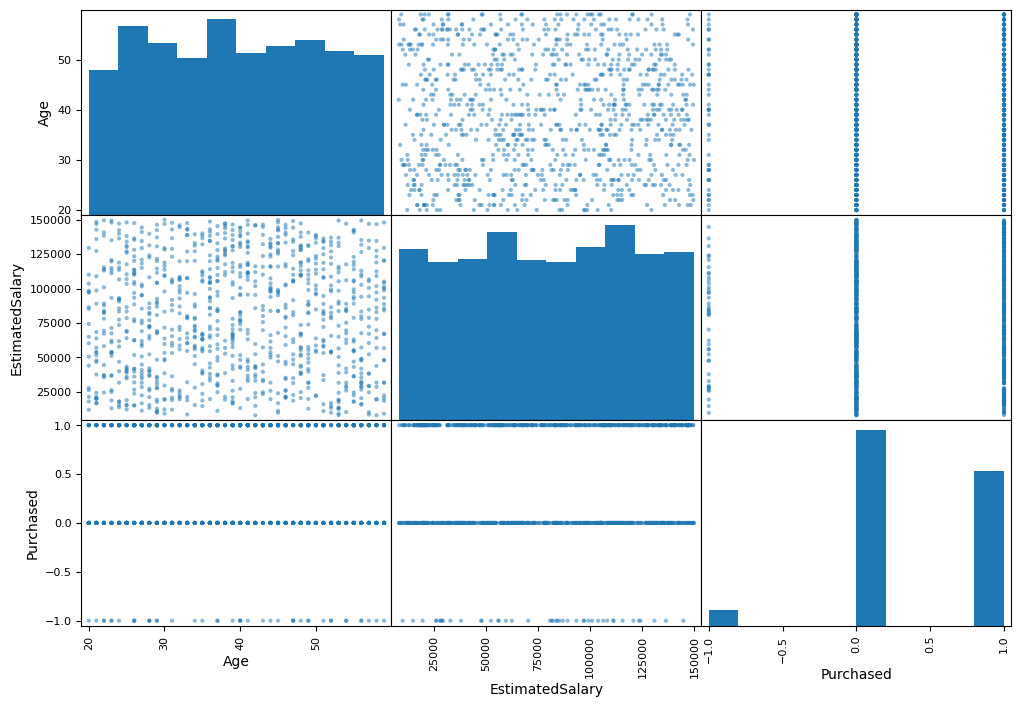

In [12]:
#. Exploring data c:
import matplotlib.pyplot as plt
%matplotlib inline

#info plz
print(importedData.info(), '\n\n')

#one hot encoding this stuff (i don't like it) idk
importedDataOneHotEncoded = pd.get_dummies(cleanedData)
importedDataCorr = importedDataOneHotEncoded.corr()
print("Corr Matrix:\n", importedDataCorr["Purchased"].sort_values(ascending = False), '\n\n', sep='')

#comment in and out as need be
# print(importedData.head(), '\n\n')
#print(importedData.info(), '\n\n')

#------------------------------------------------------

#no plot lib, will deal with later
#histogram
importedData.hist(bins=50, figsize=(20,15))
plt.show()

from pandas.plotting import scatter_matrix
attributes = ["Gender", "Age", "EstimatedSalary", "Purchased"]
plt.rcParams['axes.labelsize'] = 10
scatter_matrix(cleanedData[attributes], figsize=(12, 8))

# 4.Prepare the Data


Apply any data transformations and explain what and why

Dropped any data deemed not relevant to the model, namely name and User ID. Both of these aren't too relevant to whether or not someone is going to purchase something, thus they are dropped. 

Converted my male and female genders to numbers because models don't like strings. Simply mapped it.

Split my data after that to train


In [1]:
#REDOING THIS BECAUSE I DON'T WANT TO LOAD LIKE 3 DIFFERENT THING EVERY SINGLE TIME
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

saleDataPath = os.path.join("data", "data.csv")
importedData = pd.read_csv(saleDataPath)

#dropping name, because I really don't need it to know if someone will buy something. User ID is just hteir tag
cleanedData = importedData.drop(["name"], axis=1)
cleanedData = cleanedData.drop(["User ID"], axis=1)
cleanedData.dropna(inplace = True)

#converting my genders because I don't like them
funnyMap = {'Male': 1, 'Female': 0}
cleanedData['Gender'] = cleanedData['Gender'].map(funnyMap)

#splitting my data, because I need to train my model
x = cleanedData[['Gender', 'Age', 'EstimatedSalary']]
y = cleanedData['Purchased']
trainSaleX, testSaleX, trainSaleY, testSaleY = train_test_split(x, y, test_size=0.2, random_state=42)

print('Complete')

Complete


# 5. Model the data
Using selected ML models, experiment with your choices and describe your findings. Finish by selecting a Model to continue with

Selected Logistic Regression, as the model can only be of 3 values: 0, 1, and -1. Logistic Regression most likely would excel at that. Also mainly selected Logistic Regression because that is the model that Mr. Rivero suggested

In [2]:
#modeling time
#he started modeling
from sklearn.linear_model import LogisticRegression
import joblib

#making the model
saleModel = LogisticRegression()
saleModel.fit(trainSaleX, trainSaleY)
salePredictions = saleModel.predict(testSaleX)

#accuracy check idk
saleMSE = mean_squared_error(testSaleY, salePredictions)
saleRMSE = np.sqrt(saleMSE)
saleAPE = np.abs((testSaleY - salePredictions) / testSaleY) * 100
print('\nRMSE:', saleRMSE, '\n\nAPE:', saleAPE, '\n\nAverage APE:', np.mean(saleAPE))

#wild RMSE, NOTE: BUILD FUNCTION AND COME BACK TO TEST THE RESULT
joblib.dump(saleModel, 'logReg.pkl')


RMSE: 0.6910947404650881 

APE: 521      NaN
941    100.0
741    100.0
980      NaN
411      NaN
       ...  
332      NaN
208      NaN
992    100.0
78       NaN
29     100.0
Name: Purchased, Length: 201, dtype: float64 

Average APE: 100.0


['logReg.pkl']

# 6. Fine Tune the Model

With the select model descibe the steps taken to acheve the best rusults possiable 

I gridsearched the results using the possible parameters without breaking my model. I used cv=5 because that'd let me 5fold score, giving me the best possible result. This could of been done better if I could use the whole param grid, however, the model will blare warnings if the model is unable to do things together. For example, it is unable to do lbfgs solver with a l1 penalty. 


In [6]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

#get my thing to be quiet
# import warnings
# warnings.filterwarnings("ignore", message="The line search algorithm did not converge", category=UserWarning)

# param_grid = {
#     'penalty': ['l1', 'l2', 'elasticnet'],
#     'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
#     'tol': [1e-6, 1e-5, 1e-4, 1e-3, 1e-2],
#     'solver': ['liblinear', 'lbfgs', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
#     'fit_intercept': [True, False],
#     'max_iter': [1000, 10000, 100000, 1000000]
# }

param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  
    'tol': [1e-6, 1e-5, 1e-4, 1e-3, 1e-2],
    'max_iter': [1000, 10000, 100000, 1000000],
}

saleModel = LogisticRegression()
grid_search = GridSearchCV(estimator=saleModel, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(trainSaleX, trainSaleY)

bestParam = grid_search.best_params_
saleModel = grid_search.best_estimator_
salePredictions = saleModel.predict(testSaleX)


saleMSE = mean_squared_error(testSaleY, salePredictions)
saleRMSE = np.sqrt(saleMSE)
saleAPE = np.abs((testSaleY - salePredictions) / testSaleY) * 100
print('Best Hyperparameters:', bestParam)
print('RMSE:', saleRMSE)
print('APE:', saleAPE)
print('Average APE:', np.mean(saleAPE))

joblib.dump(saleModel, 'logReg.pkl')
print('Complete')

Best Hyperparameters: {'C': 0.01, 'max_iter': 1000, 'tol': 1e-06}
RMSE: 0.6910947404650881
APE: 521      NaN
941    100.0
741    100.0
980      NaN
411      NaN
       ...  
332      NaN
208      NaN
992    100.0
78       NaN
29     100.0
Name: Purchased, Length: 201, dtype: float64
Average APE: 100.0
Complete


# 7. Present
In a customer faceing Document provide summery of finding and detail approach taken.

1. Upon Recieving the Data, it was immediately converted to a readable format for the machine and analyzed for possible patterns or similarities through the usage of histograms as well as correlation matrixes to help train a model on. Unfortunately, no such patterns were found, and all irrelevant data was dropped. 
3. The model was trained on a logistic regression model, since the possible output would only be 0, 1, or -1. Despite of this, it resulted in a quite poor prediction model with an RMSE of around 0.7. This is largely influenced by a relatively balanced spread of prediction values across all training data. Due to the lack of patterns, the model is unable to predict anything
4. Even upon gridsearching it --a method in which we try to find the best possible parameters to improve our model--, we were unable to significantly improve it, leaving the RMSE at around 0.7. If we were to improve, we'd most likely try to gather more data as well as more parameters.
   

# 8. Launch the Model System
Define your production run code, This should be self sufficientand require only your model parameters 


In [23]:
import joblib
import pandas as pd
from sklearn.linear_model import LogisticRegression
import re

def setup(*args):
    print('Loading Model \n')
    model = joblib.load("logReg.pkl")

    dataNames = ['Gender', 'Age', 'EstimatedSalary']
    passNames = {'Gender': {'male': 1, 'female': 0}}
    dataValues = [None] * len(dataNames)

    def funny(x):
        return re.sub(r'(?=[A-Z])', ' ', x)

    def valChecker():
        x = 0
        
        while x < len(dataNames):
            dataValues[x] = input("Please Enter a Value for{}: ".format(funny(dataNames[x]))).lower()

            try:
                dataValues[x] = int(dataValues[x].lower())
            except ValueError:
                if dataNames[x] in passNames:
                    if dataValues[x].lower() in passNames[dataNames[x]]:
                        dataValues[x]  = passNames[dataNames[x]][dataValues[x]]
                    else:
                        print('{} has an invalid Value'.format(dataNames[x]), end =' ')
                        x -= 1
                else:
                    print('{} has an invalid Value'.format(dataNames[x]), end =' ')
                    x -= 1

            x += 1

        return dataNames, dataValues

    if all(parms is not None for parms in args) and len(args) == len(dataNames):
        for arg, dataName in zip(args, dataNames):
            try:
                arg = int(arg)
            except ValueError:
                if dataName in passNames:
                    if arg in passNames[dataName]:
                        arg = passNames[dataName][arg]
                    else:
                        print('Invalid Value\n')
                        return 0
                else:
                    print('Invalid Value\n')
                    return 0
                    
            dataValues.pop(0)
            dataValues.insert(arg)
    else:
        dataNames, dataValues = valChecker()

    dataFrame = pd.DataFrame({dataNames[x]: [dataValues[x]] for x in range(len(dataNames))})
    predictedValue = model.predict(dataFrame)

    print('\nPredicted Value:', predictedValue[0])
                    
setup('female', 38, '234563')


Loading Model 


Predicted Value: 0
